        Data Science: A Programming Approach
        Individual Project 1
        
        Sundesh Raj
        1001633297
        University of Texas Arlington

<h1 align='center' style="color: blue;">Correspondence Analysis</h1>

<p>Correspondence analysis (CA) or reciprocal averaging is a multivariate statistical technique proposed by Herman Otto Hartley and later developed by Jean-Paul Benzécri. It is conceptually similar to principal component analysis, but applies to categorical rather than continuous data. In a similar manner to principal component analysis, it provides a means of displaying or summarising a set of data in two-dimensional graphical form.

All data should be on the same scale for CA to be applicable, keeping in mind that the method treats rows and columns equivalently. It is traditionally applied to contingency tables — CA decomposes the chi-squared statistic associated with this table into orthogonal factors. Because CA is a descriptive technique, it can be applied to tables whether or not the $\chi^2$ statistic is appropriate</p>

<p><b>References and citations</b><p>
<ul>
    <li><a href='https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/'>Introduction to Correspondence Analysis</a></li>
    <li><a href='http://vxy10.github.io/2016/06/10/intro-MCA/'>Introduction to Multiple Correspondence Analysis</a></li>
    <li><a href='https://docs.biolab.si/2/reference/rst/Orange.projection.correspondence.html'>Correspondence Analysis</a></li>
    <li><a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html'>Chi-Squared Contingency</a></li>
</ul>

<p><b>PREPROCESSING</b></p>

<p>Like PCA (Principle Component Analysis), corresopondance analysis creates orthogonal components and for each item in a table, a set of scores (sometimes called factor scores, see Factor analysis). Correspondence analysis is performed on a contingency table, C, of size m×n where m is the number of rows and n is the number of columns.<p>

<p>Here <b>m</b> is the number of rows and <b>n</b> is the number of columns<p>

<p>If we consider a contingency table C with m rows and n columns <p>
<p>The row weights are given by ${\displaystyle w_{m}={\frac {1}{n_{C}}}C\mathbf {1} }$</p>
<p>The column weights are given by ${\displaystyle w_{n}={\frac {1}{n_{C}}}\mathbf {1} ^{T}C.}$</p>
<p>Here ${\displaystyle n_{C}=\sum _{i=1}^{n}\sum _{j=1}^{m}C_{ij}}$ is the sum of C and {\displaystyle \mathbf {1} }\mathbf {1}  is a column vector of ones with the appropriate dimension.</p>
<p>Next, compute a table S, where C is divided by the sum of C

${\displaystyle S={\frac {1}{n_{C}}}C.}$</p>

<p>Finally, compute a table M from S and the weights as such

${\displaystyle M=S-w_{m}w_{n}.}$<p>

In [136]:
import pandas as pd
import numpy as np
import itertools

from scipy.stats import chi2_contingency

import seaborn as sns; 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

<p>CA is a visualisation technique that can be applied to categorical data for data exploration. Unlike numerical data, categorical features are harder to analyse and visualise. CA uses a matrix decomposition method, namely SVD, and thus you may see CA being likened to the Principle Components Analysis (PCA). However, CA is not, strictly speaking, a PCA for categorical data, mostly because the primary objective of CA is to provide a visualisation of associations among categorical features.</p>

<p>How does one visualise categorical data? CA is based on a simple concept of a contingency table. A contingency table is a tabulation of frequencies of how categorical values are distributed by variables. This blog will be using examples from P. Yelland’s article on CA published in the Mathematica journal[1]. I will translate his Mathematica code to Python (because Python is awesome). In [1] we find CA applied to textual analysis where passages of a few authors analysed by the frequency of letters. The five authors and the letters are shown below:</p>

In [137]:
authors = ["Charles Darwin", "Rene Descartes","Thomas Hobbes", "Mary Shelley", "Mark Twain"]
initials=['CD1','CD2','CD3','RD1','RD2','RD3','TB1','TB2','TB3','MS1','MS2','MS3','MT1','MT2','MT3']

In [138]:
authorSamples = list(itertools.chain.from_iterable([[a+": "+str(i) for i in [1,2,3]] for a in authors]))
authorSamples

['Charles Darwin: 1',
 'Charles Darwin: 2',
 'Charles Darwin: 3',
 'Rene Descartes: 1',
 'Rene Descartes: 2',
 'Rene Descartes: 3',
 'Thomas Hobbes: 1',
 'Thomas Hobbes: 2',
 'Thomas Hobbes: 3',
 'Mary Shelley: 1',
 'Mary Shelley: 2',
 'Mary Shelley: 3',
 'Mark Twain: 1',
 'Mark Twain: 2',
 'Mark Twain: 3']

In [139]:
chars=["B", "C", "D", "F", "G", "H", "I", "L", "M", "N","P", "R", "S", "U", "W", "Y"]

<p>The contingency table build from how often these letters appear in three passages per author are:</p>

In [140]:
contingencyTable=[[34, 37, 44, 27, 19, 39, 74, 44, 27, 61, 12, 65, 69,22, 14, 21],
                [18, 33, 47, 24, 14, 38, 66, 41, 36,72, 15, 62, 63, 31, 12, 18],
                [32, 43, 36, 12, 21, 51, 75, 33, 23, 60, 24, 68, 85,18, 13, 14],
                [13, 31, 55, 29, 15, 62, 74, 43, 28,73, 8, 59, 54, 32, 19, 20],
                [8, 28, 34, 24, 17, 68, 75, 34, 25, 70, 16, 56, 72,31, 14, 11], 
                [9, 34, 43, 25, 18, 68, 84, 25, 32, 76,14, 69, 64, 27, 11, 18],
                [15, 20, 28, 18, 19, 65, 82, 34, 29, 89, 11, 47, 74,18, 22, 17], 
                [18, 14, 40, 25, 21, 60, 70, 15, 37,80, 15, 65, 68, 21, 25, 9],
                [19, 18, 41, 26, 19, 58, 64, 18, 38, 78, 15, 65, 72,20, 20, 11], 
                [13, 29, 49, 31, 16, 61, 73, 36, 29,69, 13, 63, 58, 18, 20, 25],
                [17, 34, 43, 29, 14, 62, 64, 26, 26, 71, 26, 78, 64, 21, 18, 12],
                [13, 22, 43, 16, 11, 70, 68, 46, 35,57, 30, 71, 57, 19, 22, 20],
                [16, 18, 56, 13, 27, 67, 61, 43, 20, 63, 14, 43, 67,34, 41, 23], 
                [15, 21, 66, 21, 19, 50, 62, 50, 24, 68, 14, 40, 58, 31, 36, 26],
                [19, 17, 70, 12, 28, 53, 72, 39, 22, 71, 11, 40, 67,25, 41, 17]]

In [141]:
dfTableForm = pd.DataFrame(data=np.transpose(sampleCrosstab), columns=authorSamples)

dfTableForm.head()

,Charles Darwin: 1,Charles Darwin: 2,Charles Darwin: 3,Rene Descartes: 1,Rene Descartes: 2,Rene Descartes: 3,Thomas Hobbes: 1,Thomas Hobbes: 2,Thomas Hobbes: 3,Mary Shelley: 1,Mary Shelley: 2,Mary Shelley: 3,Mark Twain: 1,Mark Twain: 2,Mark Twain: 3
0,34,18,32,13,8,9,15,18,19,13,17,13,16,15,19
1,37,33,43,31,28,34,20,14,18,29,34,22,18,21,17
2,44,47,36,55,34,43,28,40,41,49,43,43,56,66,70
3,27,24,12,29,24,25,18,25,26,31,29,16,13,21,12
4,19,14,21,15,17,18,19,21,19,16,14,11,27,19,28


<p><b>Chi-Squared Statistic and Chi-Squared Distances</b></p>

<p>Pearson’s $\chi^2$  test of independence can be used to say with reasonable certainty if the distribution of letters differs from one author to another. $\chi^2$  is defined as:</p>

<p>$\chi^2 = \sum_{I}\sum_{J}\frac{(n_{ij}-(\frac{n_{i.}n_{.j}}{n}))^2}{\frac{n_{i.}n_{.j}}{n}}$<p>

<p>Where n  is the total number of frequencies, $n_{ij}$  is the letter frequency in row i  and column j , and $n_{i.}$  and $n_{.j}$  are the total frequencies in row i  and column j  respectively. The product of $n_{i.}$  and $n_{.j}$  normalised by n  is the expected frequency for $n_{ij}$  under the independence assumption. Let’s call it independenceModel. The greater is $\chi^2$ , the greater is the certainty that the use of these letters is different by author. We can calculate this statistic in Python as following:<p>

In [142]:
grandTotal = np.sum(contingencyTable)
correspondenceMatrix = np.divide(contingencyTable,grandTotal)
rowTotals = np.sum(correspondenceMatrix, axis=1)
columnTotals = np.sum(correspondenceMatrix, axis=0)
 
independenceModel = np.outer(rowTotals, columnTotals)
 
#Calculate manually
chiSquaredStatistic = grandTotal*np.sum(np.square(correspondenceMatrix-independenceModel)/independenceModel)
print("Manually calculated Chi-Squared Stats : {}".format(chiSquaredStatistic))
 
# Quick check - compare to scipy Chi-Squared test
statistic, prob, dof, ex = chi2_contingency(contingencyTable)
print("Auto : {}".format(statistic))
print(np.round(prob, decimals=5))

Manually calculated Chi-Squared Stats : 448.49666422103445
Auto : 448.49666422103445
0.0


<p>In the above code correspondenceMatrix holds normalised frequencies. The $\chi^2$  statistic is 448.497, which is very unlikely to be observed under the null hypothesis (that the letter frequencies follow the same distribution). Having established this, we can continue with the CA as we now know that it should be able to show us some meaningful associations.<p>

<p><b>For the purposes of CA, the differences between the distributions of letters in the text samples are measured by $\chi^2$ -distances, which are weighted Euclidean distances between normalized rows. These are calculated by dividing row entries by their respective row totals. The weights are inversely proportional to the square roots of the column totals. $\chi^2$ -distances between row i and row k are defined as:</b></p>

$\chi^2_{distance_{ik}} = \sqrt{\sum_{J}\frac{(p_{ij}/p_{i.} - p_{kj}/p_{k.})^2}{p_{.j}}}$


In [143]:
# pre-calculate normalised rows
norm_correspondenceMatrix = np.divide(correspondenceMatrix,rowTotals[:, None])
 
chiSquaredDistances = np.zeros((correspondenceMatrix.shape[0],correspondenceMatrix.shape[0]))

norm_columnTotals = np.sum(norm_correspondenceMatrix, axis=0)
for row in range(correspondenceMatrix.shape[0]):
    chiSquaredDistances[row]=np.sqrt(np.sum(np.square(norm_correspondenceMatrix
                                                        -norm_correspondenceMatrix[row])/columnTotals, axis=1))# Save distances to the DataFrame

dfchiSquaredDistances = pd.DataFrame(data=np.round(chiSquaredDistances*100).astype(int), columns=authorSamples)
 
print(dfchiSquaredDistances)

    Charles Darwin: 1  Charles Darwin: 2  Charles Darwin: 3  \
0                   0                 21                 24   
1                  21                  0                 32   
2                  24                 32                  0   
3                  29                 20                 40   
4                  35                 26                 34   
5                  33                 24                 35   
6                  36                 32                 37   
7                  39                 33                 39   
8                  34                 28                 35   
9                  27                 23                 37   
10                 31                 26                 29   
11                 38                 31                 37   
12                 43                 40                 46   
13                 38                 33                 48   
14                 42                 41               

# Chi-Squared Distances In Graphical Form

## Calculating Row Scores

<p>CA provides a means of representing a table of $\chi^2$ -distances in a graphical form. This is where the similarity with the PCA analysis comes in. To calculate such representation we need to transform the distances to points in a Cartesian coordinate system. This is achieved by a singular value decomposition (SVD) of a matrix of standardised residuals:

\$Omega = \frac{p_{ij}-\mu_{ij}}{\sqrt{\mu_{ij}}}$</p>

In [144]:
standardizedResiduals = np.divide((correspondenceMatrix-independenceModel),np.sqrt(independenceModel))

u,s,vh = np.linalg.svd(standardizedResiduals, full_matrices=False)

<p>We are after the row scores, which are coordinates of points in a high-dimensional space (14 dimensions in this case). These points are arranged so that the Euclidean distance between two points is equal to the $\chi^2$ -distance between the two rows to which they correspond. The row scores are defined as:

$R = \delta_{r}\cdot U\cdot S $ 

where U and S are the left singular vectors matrix and singular values on the diagonal matrix from SVD. The \delta_{r}  is diagonal matrix made of the reciprocals of the square roots of the row totals.</p>

In [145]:
deltaR = np.diag(np.divide(1.0,np.sqrt(rowTotals)))
rowScores=np.dot(np.dot(deltaR,u),np.diag(s))
dfFirstTwoComponents = pd.DataFrame(data=[l[0:2] for l in rowScores], columns=['X', 'Y'], index=initials)
dfFirstTwoComponents

,X,Y
CD1,-0.070977,0.200620
CD2,-0.062109,0.094512
CD3,-0.148509,0.158889
RD1,0.030697,0.019028
RD2,-0.069552,-0.068382
RD3,-0.115119,-0.063805
TB1,-0.006890,-0.103594
TB2,-0.053382,-0.170423
TB3,-0.083822,-0.121758
MS1,-0.016408,0.001383


## Plotting the points

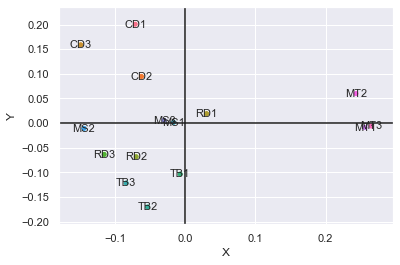

In [146]:
ax = sns.scatterplot(data=dfFirstTwoComponents,x='X', y='Y', hue=initials)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.get_legend().set_visible(False)

for label in initials:
    plt.annotate(label, 
                 (dfFirstTwoComponents.loc[label,:]['X'],
                  dfFirstTwoComponents.loc[label,:]['Y']),
                 horizontalalignment='center', verticalalignment='center',size=11)

# Multiple Correspondence Analysis

<p>Using the MCA python package to perform Multiple Correspondence Analysis on Wines dataset</p>

In [147]:
from mca import *

data = pd.read_table('wines.csv',
                     sep=',', skiprows=1, index_col=0, header=0)
X = data.drop('oak_type', axis=1)
j_sup = data.oak_type
i_sup = np.array([0, 1, 0, 1, 0, .5, .5, 1, 0, 1, 0, 0, 1, 0, .5, .5, 1, 0, .5, .5, 0, 1])
ncols = 10

<p>MCA calculations are implemented via MCA object. The default condition applies Benzécri correction for eigen values, therefore, benzecri flag has to be set to false. Below are the list of attributes for the MCA function, - .L Eigen values - .F Factor scores for columns. (components are linear combination of columns) - .G Factor scores for rows. (components are linear combination of rows) - .expl_var Explained variance. - .fs_r Projections onto the factor space, can also be computed by applying fs_r_sup on each of the row elements. - .cos_r Cosine distance between $i^{th}$ vector and $j^{th}$ factor (or row eigen vector) - .cont_r Contribution of individual categorical variable to the factor.<p>

In [148]:
mca_ben = MCA(X, ncols=ncols)
mca_ind = MCA(X, ncols=ncols, benzecri=False)
data = {'Iλ': pd.Series(mca_ind.L),
        'τI': mca_ind.expl_var(greenacre=False, N=4),
        'Zλ': pd.Series(mca_ben.L),
        'τZ': mca_ben.expl_var(greenacre=False, N=4),
        'cλ': pd.Series(mca_ben.L),
        'τc': mca_ind.expl_var(greenacre=True, N=4)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ', 'τI', 'Zλ', 'τZ', 'cλ', 'τc']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2

,Iλ,τI,Zλ,τZ,cλ,τc
Factor,,,,,,
1,0.853210,0.711009,0.700402,0.982290,0.700402,0.951889
2,0.200000,0.166667,0.012346,0.017314,0.012346,0.016779
3,0.115114,0.095928,0.000282,0.000395,0.000282,0.000383
4,0.031676,0.026397,0.000000,0.000000,0.000000,0.000000
Σ,1.200000,1.000000,0.713030,1.000000,0.713030,0.969050


<p>Next we will use functions in MCA to compute the projections onto important factors, cosine distance and contributions of individual terms to the factors</p>

In [149]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000
table3.loc[fs, 'W?'] = mca_ben.fs_r_sup(pd.DataFrame([i_sup]), N=2)[0]

np.round(table3.astype(float), 2)

Wine                        W1      W2      W3      W4      W5      W6    W?
Factor score         1    0.86   -0.71   -0.92   -0.86    0.92    0.71  0.03
                     2    0.08   -0.16    0.08    0.08    0.08   -0.16 -0.63
Squared cosines      1    0.99    0.95    0.99    0.99    0.99    0.95   NaN
                     2    0.01    0.05    0.01    0.01    0.01    0.05   NaN
Contributions x 1000 1  176.68  120.99  202.33  176.68  202.33  120.99   NaN
                     2   83.33  333.33   83.33   83.33   83.33  333.33   NaN

## Plotting the points 

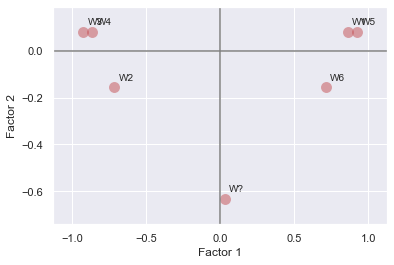

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt

points = table3.loc[fs].values
labels = table3.columns.values

plt.figure()
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.scatter(*points, s=120, marker='o', c='r', alpha=.5, linewidths=0)
for label, x, y in zip(labels, *points):
    plt.annotate(label, xy=(x, y), xytext=(x + .03, y + .03))
plt.show()